In [1]:
import os
import pandas as pd
import cv2
import numpy as np
import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
aero_old_path = "../data/aerophoto/ortho_old/192"
aero_old = os.listdir(aero_old_path)
aero_new_path = "../data/aerophoto/ortho_new/192"

ele_old_path = "../data/elevation/ortho_old/192"
ele_new_path = "../data/elevation/ortho_new/192"


In [3]:
df = pd.read_csv("../data/shape/R020101-R030101/R020101-R030101.csv")

In [8]:
df_list = df.TEXT.values
df_label = df["判定"].values
lost_name = []
for name, label in tqdm.tqdm(zip(df_list, df_label)):
    name = name + ".png"
    if not (name in aero_old):
        lost_name.append(name)


116830it [01:32, 1263.30it/s]


In [9]:
len(lost_name)

357

In [10]:
lost_name

['toshima104238.png',
 'toshima104239.png',
 'toshima104240.png',
 'toshima104241.png',
 'toshima104242.png',
 'toshima104243.png',
 'toshima104244.png',
 'toshima104245.png',
 'toshima104246.png',
 'toshima104247.png',
 'toshima104248.png',
 'toshima104249.png',
 'toshima104250.png',
 'toshima104251.png',
 'toshima104252.png',
 'toshima104253.png',
 'toshima104254.png',
 'toshima104255.png',
 'toshima104256.png',
 'toshima104257.png',
 'toshima104258.png',
 'toshima104259.png',
 'toshima104260.png',
 'toshima104261.png',
 'toshima104262.png',
 'toshima104263.png',
 'toshima104264.png',
 'toshima104265.png',
 'toshima104266.png',
 'toshima104267.png',
 'toshima104268.png',
 'toshima104269.png',
 'toshima104270.png',
 'toshima104271.png',
 'toshima104272.png',
 'toshima104273.png',
 'toshima104274.png',
 'toshima104456.png',
 'toshima104457.png',
 'toshima104458.png',
 'toshima104459.png',
 'toshima104460.png',
 'toshima104461.png',
 'toshima104462.png',
 'toshima104463.png',
 'toshima1

In [22]:
lost_name2 = []
for i in tqdm.tqdm(aero_old):
    n = i[:-4]
    if not (n in df_list):
        print(n)
        lost_name2.append(n)
        

100%|██████████████████████████████████████████████████████████████████████████| 116473/116473 [03:06<00:00, 625.30it/s]


In [19]:
len(lost_name2)

0

In [16]:
lost_name2

[]

In [20]:
len(aero_old)

116473

In [21]:
len(df_list)

116830

In [24]:
for i in aero_old:
    if "toshima10423" in i:
        print(i)

toshima10423.png
toshima104230.png
toshima104231.png
toshima104232.png
toshima104233.png
toshima104234.png
toshima104235.png
toshima104236.png
toshima104237.png


In [7]:
df = pd.read_csv("../data/result.csv", index_col = 0)

In [8]:
df[df.label == "red"].diff_aero.quantile(q=[0, 0.1, 0.5, 0.9, 1])

0.0     11.656906
0.1     30.495705
0.5     42.423111
0.9     61.423513
1.0    130.675068
Name: diff_aero, dtype: float64

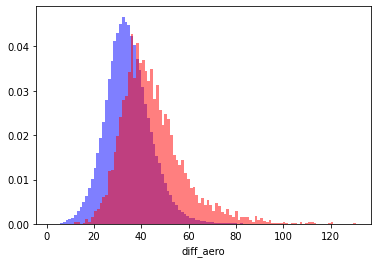

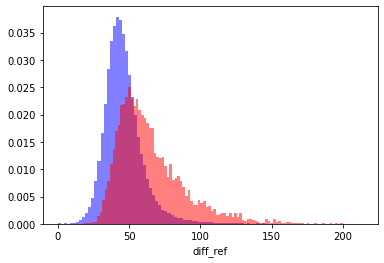

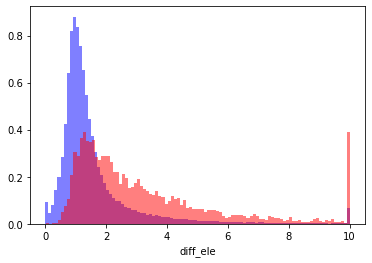

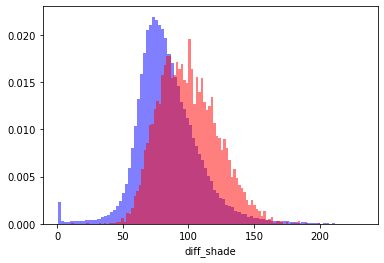

In [9]:
target = ["diff_aero", "diff_ref", "diff_ele", "diff_shade"]
df["diff_ele"] = df["diff_ele"].clip(0, 10)
for t in target:
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.hist(df[df.label == "blue"][t].values, bins=100,density=True, alpha=0.5,histtype='stepfilled', color='blue')
    ax.hist(df[df.label == "red"][t].values,density=True, bins=100,alpha=0.5,histtype='stepfilled',  color='red')
    ax.set_xlabel(t)
    plt.savefig(f"{t}.jpg")

In [13]:
df[df.label == "red"].diff_ref.quantile(q=[0, 0.1, 0.5, 0.9, 1])

0.0     18.337168
0.1     40.916593
0.5     59.260210
0.9     96.842412
1.0    199.991920
Name: diff_ref, dtype: float64

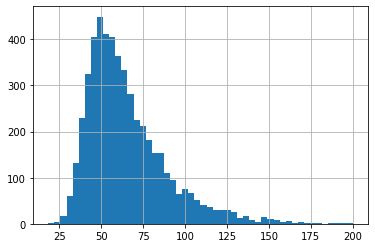

In [21]:
df[df.label == "red"].diff_ref.hist(bins = 50)
plt.savefig("diff_ref_red.jpg")

In [9]:
df[df.label == "blue"].diff_aero.min()

2.0745500645741566

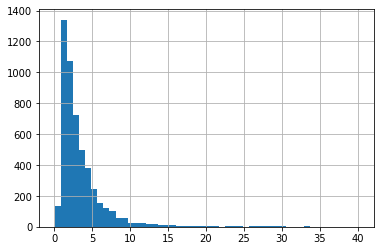

In [22]:
df[df.label == "red"].diff_ele.hist(bins = 50)
plt.savefig("diff_ele_red.jpg")

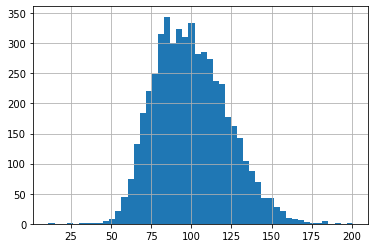

In [23]:
df[df.label == "red"].diff_shade.hist(bins = 50)
plt.savefig("diff_shade_red.jpg")

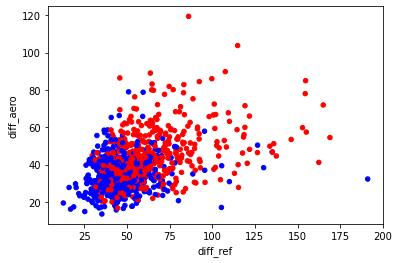

In [12]:
from sklearn.utils import shuffle

result = pd.read_csv("../data/result.csv", index_col = 0)
blue = result[result.label == "blue"].sample(n=500, random_state=1)
red = result[result.label == "red"].sample(n=500, random_state=1)
result = pd.concat([blue, red])
result = shuffle(result)

ax1 = result.plot.scatter(x='diff_ref',y='diff_aero',c='label')
plt.savefig("diff_aero_vs_ref.jpg")

toshima98376.png


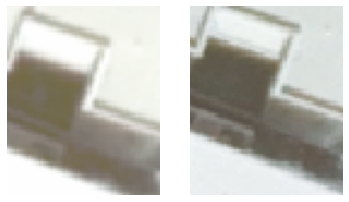

In [13]:
aero_old_path = "../data/aerophoto/ortho_old/192"
aero_new_path = "../data/aerophoto/ortho_new/192"
index = (result.diff_aero > 50) & (result.label == "blue")
target_names = result[index].name.values

idx = 14
old_tmp_1 = cv2.imread(os.path.join(aero_old_path, target_names[idx]), 1)
new_tmp_1 = cv2.imread(os.path.join(aero_new_path, target_names[idx]), 1)

print(target_names[idx])
plt.subplot(1, 2, 1)
plt.imshow(old_tmp_1)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(new_tmp_1)
plt.axis('off')

plt.show()

toshima70011.png


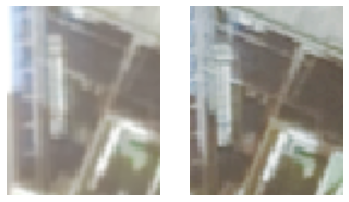

In [14]:
aero_old_path = "../data/aerophoto/ortho_old/192"
aero_new_path = "../data/aerophoto/ortho_new/192"
index = (result.diff_ele > 2) & (result.label == "blue")
target_names = result[index].name.values

idx = 14
old_tmp_1 = cv2.imread(os.path.join(aero_old_path, target_names[idx]), 1)
new_tmp_1 = cv2.imread(os.path.join(aero_new_path, target_names[idx]), 1)

print(target_names[idx])
plt.subplot(1, 2, 1)
plt.imshow(old_tmp_1)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(new_tmp_1)
plt.axis('off')

plt.show()

toshima3731.png


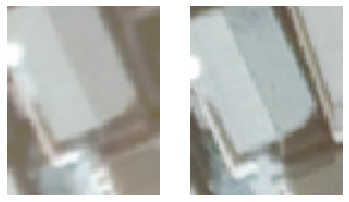

In [29]:
aero_old_path = "../data/aerophoto/ortho_old/192"
aero_new_path = "../data/aerophoto/ortho_new/192"
index = (result.diff_ele > 2) & (result.label == "red")
target_names = result[index].name.values

idx = 15
old_tmp_1 = cv2.imread(os.path.join(aero_old_path, target_names[idx]), 1)
new_tmp_1 = cv2.imread(os.path.join(aero_new_path, target_names[idx]), 1)

print(target_names[idx])
plt.subplot(1, 2, 1)
plt.imshow(old_tmp_1)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(new_tmp_1)
plt.axis('off')
plt.savefig("diff_sample_double.jpg")
plt.show()

In [30]:
diff_img = old_tmp_1.astype(float) - new_tmp_1.astype(float)
diff_img = diff_img ** 2
diff_img = np.sqrt(diff_img)

In [31]:
#diff_img = np.abs(diff_img)

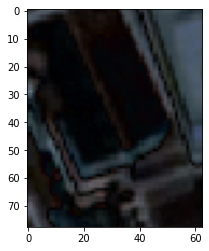

In [32]:
plt.imshow(diff_img.astype(np.uint))
plt.savefig("diff_sample.jpg")


toshima3731.png


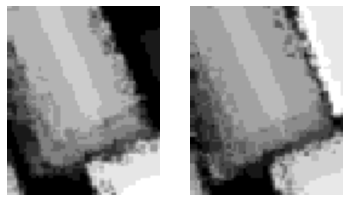

In [25]:
old_tmp_1 = cv2.imread(os.path.join(ele_old_path, target_names[idx]), 0)
new_tmp_1 = cv2.imread(os.path.join(ele_new_path, target_names[idx]), 0)

print(target_names[idx])
plt.subplot(1, 2, 1)
plt.gray()

plt.imshow(old_tmp_1)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(new_tmp_1)
plt.axis('off')
plt.gray()
plt.savefig("diff_elevation_sample_double.jpg")
plt.show()

In [23]:
old_tmp_1

array([[20, 20, 19, ..., 13, 13, 13],
       [19, 19, 19, ..., 13, 13, 13],
       [20, 20, 20, ..., 13, 13, 13],
       ...,
       [20, 20, 19, ..., 23, 23, 23],
       [20, 20, 20, ..., 23, 23, 23],
       [21, 21, 21, ..., 23, 23, 23]], dtype=uint8)

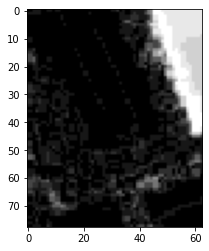

In [27]:
diff_img = old_tmp_1.astype(float) - new_tmp_1.astype(float)
diff_img = diff_img ** 2
diff_img = np.sqrt(diff_img)
plt.imshow(diff_img.astype(np.uint))
plt.savefig("diff_ele_sample.jpg")